In [30]:
#### Imports ####

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install causality
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install decorator>=4.1.2
!{sys.executable} -m pip install networkx>=2.0
!{sys.executable} -m pip install numpy>=1.13.3
!{sys.executable} -m pip install pandas>=0.20.3
!{sys.executable} -m pip install patsy>=0.4.1
!{sys.executable} -m pip install python-dateutil>=2.6.1
!{sys.executable} -m pip install pytz>=2017.2
!{sys.executable} -m pip install scipy>=0.19.1
!{sys.executable} -m pip install six>=1.11.0
!{sys.executable} -m pip install statsmodels>=0.8.0

!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib


# causality imports
# IC Algorithm Tutorial: https://pypi.org/project/causality/
import numpy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
print('causality packages imported successfully')

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
causality packages imported successfully


In [13]:
# load the data into a dataframe:
data_df = pd.read_csv('InSilicoSize10-Yeast1-nonoise-trajectories.tsv', sep='\t', header=0)
data_df = data_df.drop(['Time'], axis=1)
data_df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,0.927885,0.773800,0.466791,0.041599,0.254972,0.260750,0.760842,0.356577,0.776428,0.809378
1,0.747095,0.720259,0.567268,0.033197,0.350609,0.496989,0.714139,0.403415,0.823537,0.847036
2,0.661731,0.680738,0.648811,0.026896,0.419695,0.657734,0.676216,0.435762,0.860918,0.877255
3,0.620262,0.651376,0.714989,0.022161,0.469598,0.767111,0.645426,0.458126,0.890491,0.901503
4,0.599249,0.629404,0.768696,0.018577,0.505653,0.841534,0.620428,0.473612,0.913835,0.920962
...,...,...,...,...,...,...,...,...,...,...
79,0.567847,0.565386,0.984815,0.008402,0.600014,0.998433,0.504029,0.510041,0.979617,0.997560
80,0.567651,0.564369,0.987677,0.008011,0.600002,0.998934,0.505634,0.509965,0.983955,0.998042
81,0.567493,0.563595,0.989999,0.007705,0.599991,0.999275,0.506936,0.509903,0.987353,0.998429
82,0.567366,0.563006,0.991883,0.007467,0.599982,0.999506,0.507994,0.509853,0.990014,0.998739


In [14]:
# Save headers/column names to a list
columns_list = list(data_df.columns)

# Save the number of columns/headers present in the dataset
number_of_columns = len(columns_list)
print(number_of_columns)

10


In [15]:
# Create a list of 'c's to denote continuous variables for the headers/columns/variables given in the dataset
c_list = []
def c_list_maker(n):
    c_list = ['c'] * n
    return c_list

In [16]:
c_value = c_list_maker(number_of_columns)

In [17]:
# Merge headers list and type of variable list
final_list = []
for (item1, item2) in zip(columns_list, c_value):
    final_list.append(item1)
    final_list.append(item2)

print(final_list)

['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']


In [23]:
header_dct = {}
# Convert list to dictionary
def Convert(final_list):
    header_dct = {final_list[i]: final_list[1] for i in range(0, len(final_list), 2)}
    return header_dct

header_dct = Convert(final_list)

# Check if converted correctly
# print(Convert(final_list))
print(header_dct)

{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}


In [24]:
# Merge headers list and type of variable list
X_list = []
for (item1, item2) in zip(columns_list, columns_list):
    X_list.append(item1)
    X_list.append(item2)

print(X_list)

['G1', 'G1', 'G2', 'G2', 'G3', 'G3', 'G4', 'G4', 'G5', 'G5', 'G6', 'G6', 'G7', 'G7', 'G8', 'G8', 'G9', 'G9', 'G10', 'G10']


In [25]:
# run the IC search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(data_df, header_dct)

In [26]:
graph.edges(data=True)

EdgeDataView([('G1', 'G2', {'marked': False, 'arrows': ['G1']}), ('G1', 'G7', {'marked': True, 'arrows': ['G7', 'G7']}), ('G1', 'G9', {'marked': False, 'arrows': ['G1', 'G9']}), ('G2', 'G5', {'marked': False, 'arrows': ['G5', 'G5']}), ('G3', 'G5', {'marked': False, 'arrows': ['G3', 'G5', 'G5']}), ('G3', 'G6', {'marked': True, 'arrows': ['G6']}), ('G3', 'G9', {'marked': False, 'arrows': ['G3', 'G9', 'G9']}), ('G4', 'G8', {'marked': False, 'arrows': ['G8']}), ('G5', 'G8', {'marked': False, 'arrows': ['G5', 'G5', 'G8']}), ('G7', 'G9', {'marked': False, 'arrows': ['G7', 'G9']}), ('G7', 'G10', {'marked': False, 'arrows': ['G7', 'G7']})])

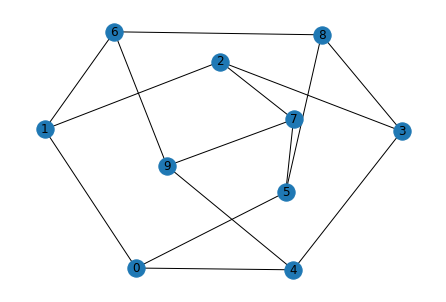

In [36]:
G = nx.Graph()
G.add_nodes_from(["G1", "G7"])
G.add_nodes_from(["G3", "G6"])

GP = nx.petersen_graph()
nx.draw(GP, with_labels=True)
plt.show()